<a href="https://colab.research.google.com/github/RashaAlharthi/Advanced_Computer_Vision_Project_Assignment/blob/main/English_NLP_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BY: RASHA ALHARTHI**

### First I need to download packeges befor import it

In [29]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Importing the needed packages

In [97]:
#  Importing Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import string
import sys

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### Get the dataset

In [44]:
FinancialBank_df = pd.read_csv("all-data.csv", names=['Sentiment','News'], encoding="ISO-8859-1")

### About the datset

In [7]:
print('\033[1m' + '------------------ Shape ------------------' + '\033[0m')
print(FinancialBank_df.shape)
print('\033[1m' + '------------------ Types ------------------' + '\033[0m')
print(FinancialBank_df.dtypes)
print('\033[1m' + '------------------ Head ------------------' + '\033[0m')
print(FinancialBank_df.head())
print('\033[1m' + '------------------ Tail ------------------' + '\033[0m')
print(FinancialBank_df.head())
print('\033[1m' + '--------------- Unique Elements ---------------' + '\033[0m')
print(FinancialBank_df.nunique())
print('\033[1m' + '------------------ NA ------------------' + '\033[0m')
print(FinancialBank_df.isnull().sum())
print('\033[1m' + '------------------ Quantiles ------------------' + '\033[0m')
print(FinancialBank_df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
print('\033[1m' + '------------------ Sample ------------------' + '\033[0m')
print(FinancialBank_df.sample(5))

------------------ Shape ------------------
(4846, 2)
------------------ Types ------------------
Sentiment    object
News         object
dtype: object
------------------ Head ------------------
  Sentiment                                               News
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
------------------ Tail ------------------
  Sentiment                                               News
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
------

###  NLP preprocessing

In [46]:
# Cleaning steps 

lm = WordNetLemmatizer()
ps = PorterStemmer()
# Text preprocessing
#corpous = list()
def news_clean(text):
    
    # Remove unnessary charcters
  #text = re.sub('(<br/>)&&(<a).*(>).*(</a>)&&(&amp)&&(&gt)&&(&lt)&&(\xa0)',' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)

    # lowers the text --> no capitalization
  text = str(text).lower()

  text_list = text.split()
    
    # Applying lemmatizers and stop words removal 
  text_list =  [lm.lemmatize(word) for word in text_list if not word in set(stopwords.words('english')) and len(word) > 1 ]
  text = ' '.join(text_list)
 # corpous.append(text)
  return text


# Applying the cleaning function to all news

corpous= []
for it in list(FinancialBank_df['News']):
    text = news_clean(it)
    corpous.append(text)

In [47]:
FinancialBank_df["target"] = FinancialBank_df["Sentiment"].map({"positive": 1, "neutral":0, "negative": -1})

In [48]:
# Converting words into numbers for applying the machine learning model (Vectorization)
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpous).toarray()
# Dependent Feature
y = FinancialBank_df.target

### Splitting the data for the ML Model

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

### Building ML Models

In [50]:
# Build Models

models = {
    MultinomialNB():'Multinomial Naive Bayes',
    LogisticRegression(max_iter=300):'Logistic Regression',
    SVC(C=1.0, kernel='linear', degree=3, gamma='auto'):"Support Vector Machine"
}
for m in models.keys():
    m.fit(X_train,y_train)

In [51]:
# Check Accuracy for each model
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Multinomial Naive Bayes is :  68.35051546391753 %
Accuracy Score for Logistic Regression is :  74.43298969072166 %
Accuracy Score for Support Vector Machine is :  70.0 %


### Use the trained model for single inference cases and check the results.

In [57]:
preds = [] # {0: Multinomial Naive Bayes, 1: Logistic Regression, 2: Support Vector Machine}
for m in models.keys():
    preds.append(m.predict(X_test))

In [72]:
# to look at the predictions
preds

[array([ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        -1,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,
        -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  1,  1,  0,  0,  1,  0, -1, -1,  0,  1, -1,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  1,  0,  1, -1,  1,  0,  0, -1,
         0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  1,  1,  0,  1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,  0,  1,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,
         0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
         0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  1, -1,  1,  0,  1,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  1,
         0, 

In [67]:
# testing the first value in the test set with the first value in the predcited result from the best model
## The predicted value matched the actual value in the single inference
(y_test[0] == preds[1][0])

True

### Here I will make the prediction for all the rows

In [70]:
test_dataset = pd.DataFrame()

test_dataset['Actual_target'] = y_test.to_numpy()
test_dataset['Predict_target'] = preds[1] # the best model in index 1

test_dataset.head()

,Actual_target,Predict_target
0,0,0
1,1,0
2,1,0
3,0,1
4,0,0


In [71]:
# Counting the records when the actual and the predicitons are the same

(test_dataset['Actual_target'] == test_dataset['Predict_target']).value_counts()

True     722
False    248
dtype: int64

### I create the Evaluation reports and confusion Matrices to look deeply at the models performance 

In [96]:
# Check the Evaluation reports
i=0
for model,name in models.items():
  print(f"\n\nEvaluation report for {name} is :\n\n", classification_report(y_test,preds[i]))
  i+=1



Evaluation report for Multinomial Naive Bayes is :

               precision    recall  f1-score   support

          -1       0.54      0.59      0.57       117
           0       0.73      0.86      0.79       583
           1       0.59      0.35      0.44       270

    accuracy                           0.68       970
   macro avg       0.62      0.60      0.60       970
weighted avg       0.67      0.68      0.66       970



Evaluation report for Logistic Regression is :

               precision    recall  f1-score   support

          -1       0.75      0.55      0.63       117
           0       0.77      0.89      0.82       583
           1       0.67      0.51      0.58       270

    accuracy                           0.74       970
   macro avg       0.73      0.65      0.68       970
weighted avg       0.74      0.74      0.73       970



Evaluation report for Support Vector Machine is :

               precision    recall  f1-score   support

          -1       0.57

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa


\Confusion matrix for Multinomial Naive Bayes is :


\Confusion matrix for Logistic Regression is :


\Confusion matrix for Support Vector Machine is :



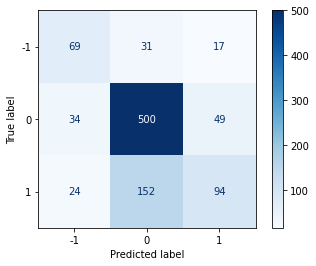

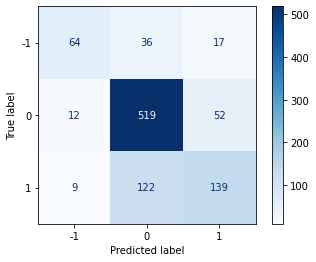

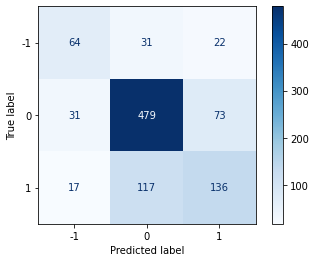

In [98]:
# Check the Confusion matrices
for model,name in models.items():
  print(f"\n\Confusion matrix for {name} is :\n\n", plot_confusion_matrix(model, X=X_test, y_true=y_test, cmap='Blues'))